In [2]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [3]:
downloaded = drive.CreateFile({'id':'1K8K8VI5CKXp1tYkkoGRHcwlQUyGVCwuY'})
downloaded.GetContentFile('summer-products.csv') 
downloaded = drive.CreateFile({'id':'1UXZ49Pu5IYuGnsIlG02onNqXjL5rCy7T'})
downloaded.GetContentFile('unique-categories.csv') 
downloaded = drive.CreateFile({'id':'1P_s_o4Hc4ueEdGzNy7ZLl-fsW5dZv0rQ'})
downloaded.GetContentFile('unique-categories.sorted-by-count.csv') 

In [4]:
# Xiaohui Wang (Blair), Jiayue Niu (Carl), Salwa Abdul Qayyum, Jingwen Lu (Wendy)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator
import numpy as np
from PIL import Image

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
sp = pd.read_csv('summer-products.csv')
print(sp.shape)
sp.head(3)

(1573, 43)


title  ... crawl_month
0  2020 Summer Vintage Flamingo Print  Pajamas Se...  ...     2020-08
1  SSHOUSE Summer Casual Sleeveless Soirée Party ...  ...     2020-08
2  2020 Nouvelle Arrivée Femmes Printemps et Été ...  ...     2020-08

[3 rows x 43 columns]

In [6]:
uc = pd.read_csv('unique-categories.csv')
print(uc.shape)
uc.head(3)

(2620, 1)


tag
0  #fashion #shorts
1  #fashion #tshirt
2        #Sport Bra

In [7]:
ucs = pd.read_csv('unique-categories.sorted-by-count.csv')
print(ucs.shape)
ucs.head(3)

(2620, 2)


count          keyword
0   1321           Summer
1   1315  Women's Fashion
2   1082          Fashion

In [8]:
# analysis on retail_price
# reference price for similar articles on the market, or in other stores/places. 
retail_price = sp['retail_price'].agg(['mean', 'max', 'min', 'median']).transpose
retail_price

<bound method IndexOpsMixin.transpose of mean       23.28862
max       252.00000
min         1.00000
median     10.00000
Name: retail_price, dtype: float64>

Text(0.5, 1.0, 'Retail Price Distribution')

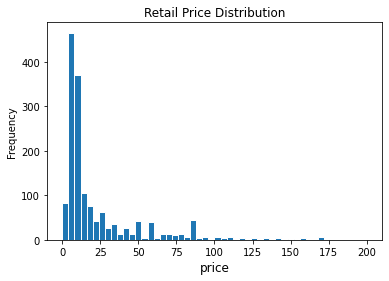

In [9]:
(sp['retail_price']).plot.hist(bins=50, edgecolor = 'white', range = [0, 200])
plt.xlabel('price', fontsize=12)
plt.title('Retail Price Distribution')

['CN' 'US' nan 'VE' 'AT' 'SG' 'GB']


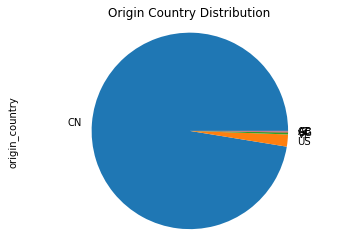

In [10]:
# analysis on origin country
labels = sp['origin_country']

(sp['origin_country']).value_counts().plot(kind='pie').axis('equal') 

plt.title('Origin Country Distribution')

print (labels.unique())
# Most products from China and US

In [ ]:
# group ratings into 5 categories
# classification
# MLP, SVM, MNB

Text(0.5, 1.0, 'Rating Distribution')

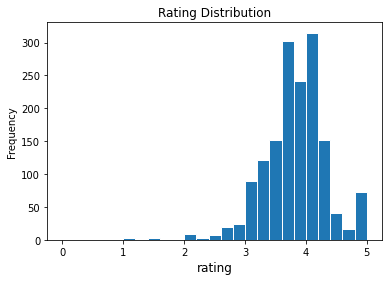

In [11]:
(sp['rating']).plot.hist(bins=25, edgecolor = 'white', range = [0, 5])
plt.xlabel('rating', fontsize=12)
plt.title('Rating Distribution')

In [12]:
ratings = sp['rating'].agg(['mean', 'max', 'min', 'median']).transpose
ratings

<bound method IndexOpsMixin.transpose of mean      3.820896
max       5.000000
min       1.000000
median    3.850000
Name: rating, dtype: float64>

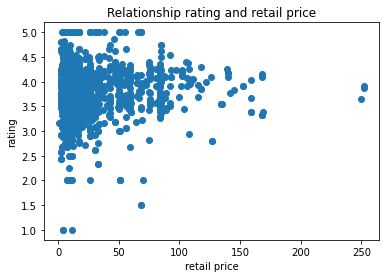

In [13]:
# analysis on rating and retail_price
x=sp['retail_price']
y=sp['rating']
plt.scatter(x, y)
plt.title('Relationship rating and retail price')
plt.xlabel('retail price')
plt.ylabel('rating')
plt.show()

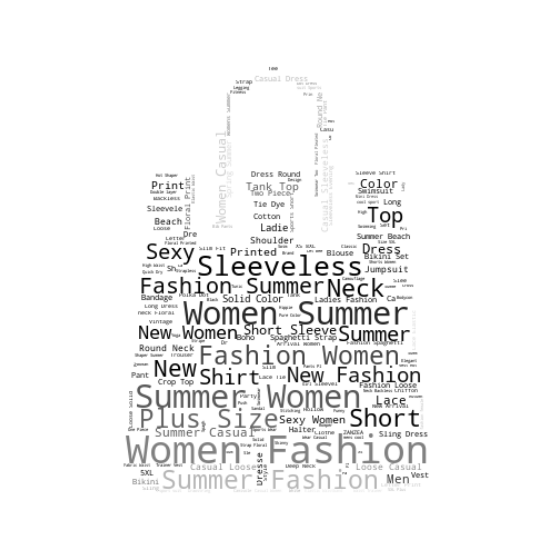

In [15]:
# Wordcloud for keywords
downloaded = drive.CreateFile({'id':'1LNpVfnLBD92MDXrEzXFfYeTcRIvmW--L'})
downloaded.GetContentFile('shopping_bag.jpg') 

mask = np.array(Image.open("shopping_bag.jpg"))

wordcloud = WordCloud(width=1400, height=800,max_font_size=500,background_color="white",mask=mask).generate(sp['title_orig'].to_string())
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.show() 


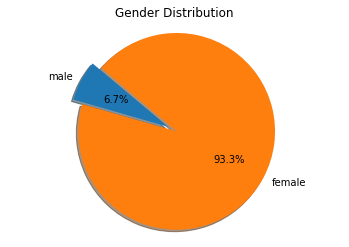

In [16]:
# analysis on gender
totalEntry = len(sp)
male = sp.title_orig.str.count("Men").sum()/totalEntry*100
female = sp.title_orig.str.count("Women").sum()/totalEntry*100

labels = 'male','female'
sizes = [male,female]
explode = (0.1, 0)
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Gender Distribution')
plt.show()

In [17]:
import numpy as np 
import scipy.cluster.hierarchy as sch
import mpl_toolkits.mplot3d.axes3d as p3
import seaborn as sns
from sklearn import metrics, mixture, cluster, datasets
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_moons
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from sklearn.neighbors import kneighbors_graph
from itertools import cycle, islice
import time

**Machine Learning: K-means clustering**

The most popular clustering method which aims on searating groups by division of their variance. 
SSE is defined as the sum of the squared distance between centroid and each member of the cluster. 

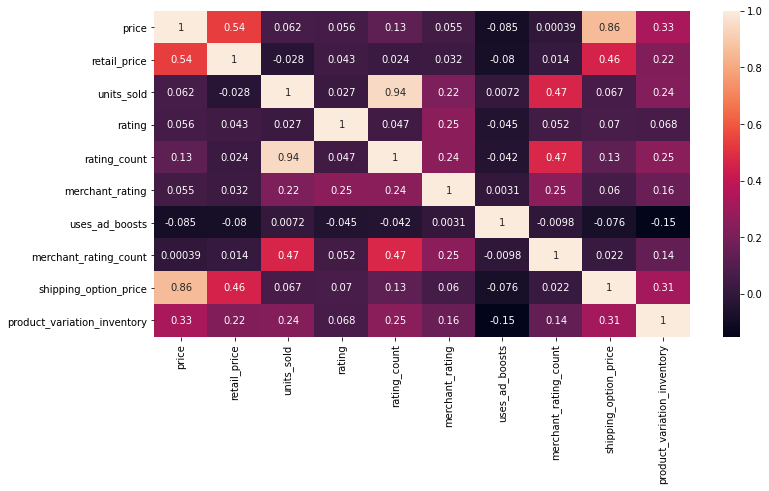

In [18]:
# use correlation heatmap for feature generation
features= sp[['price','retail_price','units_sold','rating','rating_count','merchant_rating',
              'uses_ad_boosts','merchant_rating_count','shipping_option_price','product_variation_inventory']]
corr = features.corr(method='spearman')
plt.figure(figsize=(12,6));
sns.heatmap(corr,annot=True,);
# interesting feature: shipping_option_price

In [19]:
# clean data
sp_clean = sp[['price','units_sold','shipping_option_price']]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: ConvergenceWarning: Number of distinct clusters (9) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  import sys


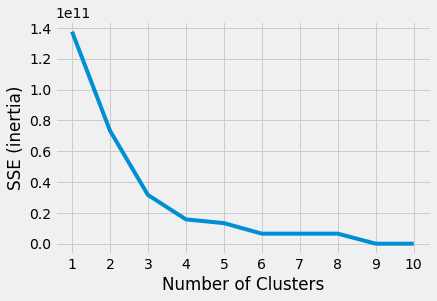

In [20]:
kmeans_kwargs = {"init": "random","n_init": 10,"max_iter": 300,"random_state": 42}

# find how many clusters we want
sse = []
for k in range(1, 11):
   kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
   kmeans.fit(sp_clean)
   sse.append(kmeans.inertia_)

plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE (inertia)")
plt.show()

*3 or 4* clusters seem sufficient.

SSE is defined as the sum of the squared distance between centroid and each member of the cluster. 

Inertia equals to: 31609688963.32861


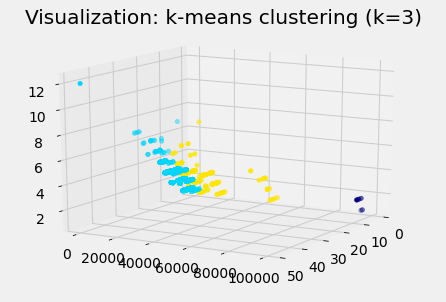

In [21]:
X = sp_clean.values
KMcluster = KMeans(init="random",n_clusters=3,max_iter=300)

KMcluster_fit = KMcluster.fit(sp_clean)
print('Inertia equals to: ' + str(KMcluster.inertia_))
KMlabels = KMcluster.labels_

fig, ax = plt.subplots(nrows=1, ncols=1)
ax = p3.Axes3D(fig)
ax.view_init(15, 30)

for l in np.unique(KMlabels):
    ax.scatter(X[KMlabels == l, 0], X[KMlabels == l, 1], X[KMlabels == l, 2],color=plt.cm.jet(float(l) / np.max(KMlabels + 1)))

plt.title('Visualization: k-means clustering (k=3)' )
plt.show()

evaluation for clustering analysis: elbow method, Silhouette analysis
https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a

In [22]:
#order cluster method (cloned from Web)
def order_cluster(cluster_field_name, target_field_name,df,ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final

In [23]:
# inspect the 3 clusters!
sp_clean['cluster number'] = KMeans(n_clusters=3).fit(sp_clean).predict(sp_clean)

# set target field to be 'units_sold'
sp_clean = order_cluster(df=sp_clean,cluster_field_name='cluster number',target_field_name='units_sold',ascending=True)
sp_clean.groupby('cluster number')[['shipping_option_price','units_sold','price']].describe()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


shipping_option_price                      ... price            
                               count      mean       std  ...   50%   75%   max
cluster number                                            ...                  
0                             1270.0  2.342520  1.046592  ...   8.0  11.0  49.0
1                              280.0  2.392857  0.921246  ...   8.0  11.0  22.0
2                               23.0  1.913043  0.900154  ...   7.0   8.0  15.0

[3 rows x 24 columns]

**Findings from K-means Clustering:**

Products in cluster#2 has the highest units sold with an average of 63043 per product, which far exceeds the averages in the other 2 categories.
This high-sales feature in cluster#2 corresponds to the lowest mean shipping_option_price (1.91), as well as lowest mean price (6.73) among the 3 clusters. 

Thoughts: 
Concentrating advertising and other resources on cluster#2 type of products for yielding better sales and high profits.

To-do:
Pick the products that have the highest units sold. Inspect what percentage of sales these products have achieved in comparison with those in other groups. If there is data available, inspect on profits as well.

**Machine Learning: Logistic Regression**

Analyze what factors are associated with product ratings, and predict ratings given certain product information.

In [ ]:
from PIL import Image
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils.testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore",category=ConvergenceWarning)
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate, KFold, learning_curve, validation_curve
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix, roc_curve
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
df = sp.copy(deep=True)
df['rating']=round(df['rating'])
df['price_diff']= df['price']-df['retail_price']
X =df[['price_diff','price','retail_price','units_sold']]
y= df['rating']

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = True)
#Using a standard scaler here
scaler = StandardScaler()
#Scaling data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
clf = LogisticRegression(C=0.05,penalty='l2',solver='liblinear')
clf.fit(X_train,y_train)
y_train_pred = clf.predict(X_train)
y_pred = clf.predict(X_test)
ACC = accuracy_score(y_test,y_pred)
train_ACC = accuracy_score(y_train_pred,y_train)
# Accuracy
print ("This model got an accuracy of {}% on the training set".format(round(train_ACC*100,2)))
print ("This model got an accuracy of {}% on the testing set".format(round(ACC*100,2)))

This model got an accuracy of 71.25% on the testing set
This model got an accuracy of 72.59% on the testing set


In [ ]:
def plot_confusion_matrix(y_true, y_pred,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'
            # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
            xticklabels=["1","2","3","4","5"], yticklabels=["1","2","3","4","5"],
           title=title,
           ylabel='True label',
           xlabel='Predicted label')
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), ha="right",
             rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Confusion matrix, without normalization
[[  0   0   3   0]
 [  0   0  80   0]
 [  0   0 286   0]
 [  0   0  25   0]]


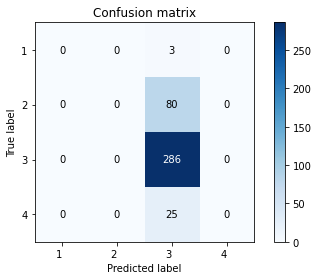

In [ ]:
# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred,
                      title='Confusion matrix')